# Data Load

In [1]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

sns.set() 

import json
import requests

plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df1 = pd.read_csv('./블록별 시간대별소액결제건수 카드소비패턴.csv', encoding='CP949')
df1.head()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   서울시민업종코드(UPJONG_CD)  500 non-null    object
 1   기준년월(YM)             500 non-null    int64 
 2   시간대구간(TIME)          500 non-null    int64 
 3   고객주소블록코드(BLOCK_CD)   500 non-null    int64 
 4   카드이용금액계(AMT_CORR)    500 non-null    int64 
 5   소액결제건수(MICRO_PYM)    500 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 23.6+ KB


In [ ]:
df2 = pd.read_csv('./집계구별 일별소비지역별 카드소비패턴.csv', encoding='CP949')
# df2.head()
# df2.info()
df2[df2['가맹점주소시군구(SGG)'].isna()]

In [4]:
df4 = pd.read_csv('./카드소비 업종코드.csv', encoding='CP949')
df4.head()
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   업종코드(UPJONG_CD)  75 non-null     object
 1   대분류(CLASS1)      75 non-null     object
 2   중분류(CLASS2)      75 non-null     object
 3   소분류(CLASS3)      75 non-null     object
dtypes: object(4)
memory usage: 2.5+ KB


In [5]:
df3 = pd.read_csv('./집계구별 일별시간대별 카드소비패턴.csv', encoding='CP949')
# df3.head()
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   업종대분류(UPJONG_CLASS1)  500 non-null    object
 1   기준일자(YMD)             500 non-null    int64 
 2   시간대구간(TIME)           500 non-null    int64 
 3   고객주소집계구별(TOT_REG_CD)  500 non-null    int64 
 4   카드이용금액계(AMT_CORR)     500 non-null    int64 
 5   카드이용건수계(USECT_CORR)   500 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 23.6+ KB


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
len(df3['기준일자(YMD)'])

500

In [8]:
df3['기준일자(YMD)'] = df3['기준일자(YMD)'].astype(str)
df3['y'] = df3['기준일자(YMD)'].str[0:4]
df3['m'] =df3['기준일자(YMD)'].str[4:6]
df3['d'] =df3['기준일자(YMD)'].str[6:8]
df3.head()

,업종대분류(UPJONG_CLASS1),기준일자(YMD),시간대구간(TIME),고객주소집계구별(TOT_REG_CD),카드이용금액계(AMT_CORR),카드이용건수계(USECT_CORR),y,m,d
0,요식/유흥,20161004,6,1123076010009,104624,10,2016,10,04
1,유통,20210303,5,1122060030003,382592,20,2021,03,03
2,유통,20170606,6,1123066022301,341688,5,2017,06,06
3,스포츠/문화/레저,20171206,5,1124075020103,925118,5,2017,12,06
4,의료,20160909,6,1113075030002,217985,50,2016,09,09


In [9]:
df3['업종대분류(UPJONG_CLASS1)'] = df3['업종대분류(UPJONG_CLASS1)'].replace(['가전/가구','가정생활/서비스'],'가정생활')
df3['업종대분류(UPJONG_CLASS1)'] = df3['업종대분류(UPJONG_CLASS1)'].replace('교육/학원','교육')
df3['업종대분류(UPJONG_CLASS1)'] = df3['업종대분류(UPJONG_CLASS1)'].replace(['스포츠/문화/레저','여행/교통'],'문화')
df3['업종대분류(UPJONG_CLASS1)'] = df3['업종대분류(UPJONG_CLASS1)'].replace(['주유','자동차'],'교통')
df3['업종대분류(UPJONG_CLASS1)'] = df3['업종대분류(UPJONG_CLASS1)'].replace(['요식/유흥','음/식료품'],'식품')
df3['업종대분류(UPJONG_CLASS1)'] = df3['업종대분류(UPJONG_CLASS1)'].replace(['의류/잡화','미용'],'패션')
df3['업종대분류(UPJONG_CLASS1)'].value_counts()

df3 = df3.drop('고객주소집계구별(TOT_REG_CD)', axis = 1)
df3.head()

,업종대분류(UPJONG_CLASS1),기준일자(YMD),시간대구간(TIME),카드이용금액계(AMT_CORR),카드이용건수계(USECT_CORR),y,m,d
0,식품,20161004,6,104624,10,2016,10,04
1,유통,20210303,5,382592,20,2021,03,03
2,유통,20170606,6,341688,5,2017,06,06
3,문화,20171206,5,925118,5,2017,12,06
4,의료,20160909,6,217985,50,2016,09,09


In [10]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   업종대분류(UPJONG_CLASS1)  500 non-null    object
 1   기준일자(YMD)             500 non-null    object
 2   시간대구간(TIME)           500 non-null    int64 
 3   카드이용금액계(AMT_CORR)     500 non-null    int64 
 4   카드이용건수계(USECT_CORR)   500 non-null    int64 
 5   y                     500 non-null    object
 6   m                     500 non-null    object
 7   d                     500 non-null    object
dtypes: int64(3), object(5)
memory usage: 31.4+ KB


가전/가구        11
가정생활/서비스     56
------------------------- (가정생활)
교육/학원        19
------------------------- (교육)
스포츠/문화/레저    50
여행/교통          12
------------------------- (문화)
주유           25
자동차           7
------------------------- (교통)
요식/유흥        94
음/식료품        30
------------------------ (식품)
유통           68
-------------------- (유통)
의료           50
----------------------- (의료)
의류/잡화        17
미용           11
---------------------- (패션)
전자상거래        44
-------------------------- (전자상거래)


총 9개

In [11]:
df3 = df3.drop([499,444,110,121],axis = 0)

In [12]:
mdf3 = df3.sort_values(['m','업종대분류(UPJONG_CLASS1)'])
cdf3 = df3.sort_values(['업종대분류(UPJONG_CLASS1)','m'])

cdf16= df3[df3['y']=='2016'].sort_values(['업종대분류(UPJONG_CLASS1)','m'])
cdf17= df3[df3['y']=='2017'].sort_values(['업종대분류(UPJONG_CLASS1)','m'])
cdf18= df3[df3['y']=='2018'].sort_values(['업종대분류(UPJONG_CLASS1)','m'])
cdf19= df3[df3['y']=='2019'].sort_values(['업종대분류(UPJONG_CLASS1)','m'])
cdf20= df3[df3['y']=='2020'].sort_values(['업종대분류(UPJONG_CLASS1)','m'])
cdf21= df3[df3['y']=='2021'].sort_values(['업종대분류(UPJONG_CLASS1)','m'])

mdf16= df3[df3['y']=='2016'].sort_values(['m','업종대분류(UPJONG_CLASS1)'])
mdf17= df3[df3['y']=='2017'].sort_values(['m','업종대분류(UPJONG_CLASS1)'])
mdf18= df3[df3['y']=='2018'].sort_values(['m','업종대분류(UPJONG_CLASS1)'])
mdf19= df3[df3['y']=='2019'].sort_values(['m','업종대분류(UPJONG_CLASS1)'])
mdf20= df3[df3['y']=='2020'].sort_values(['m','업종대분류(UPJONG_CLASS1)'])
mdf21= df3[df3['y']=='2021'].sort_values(['m','업종대분류(UPJONG_CLASS1)'])




# Graph

## 카드이용건수계약/시간대별로 

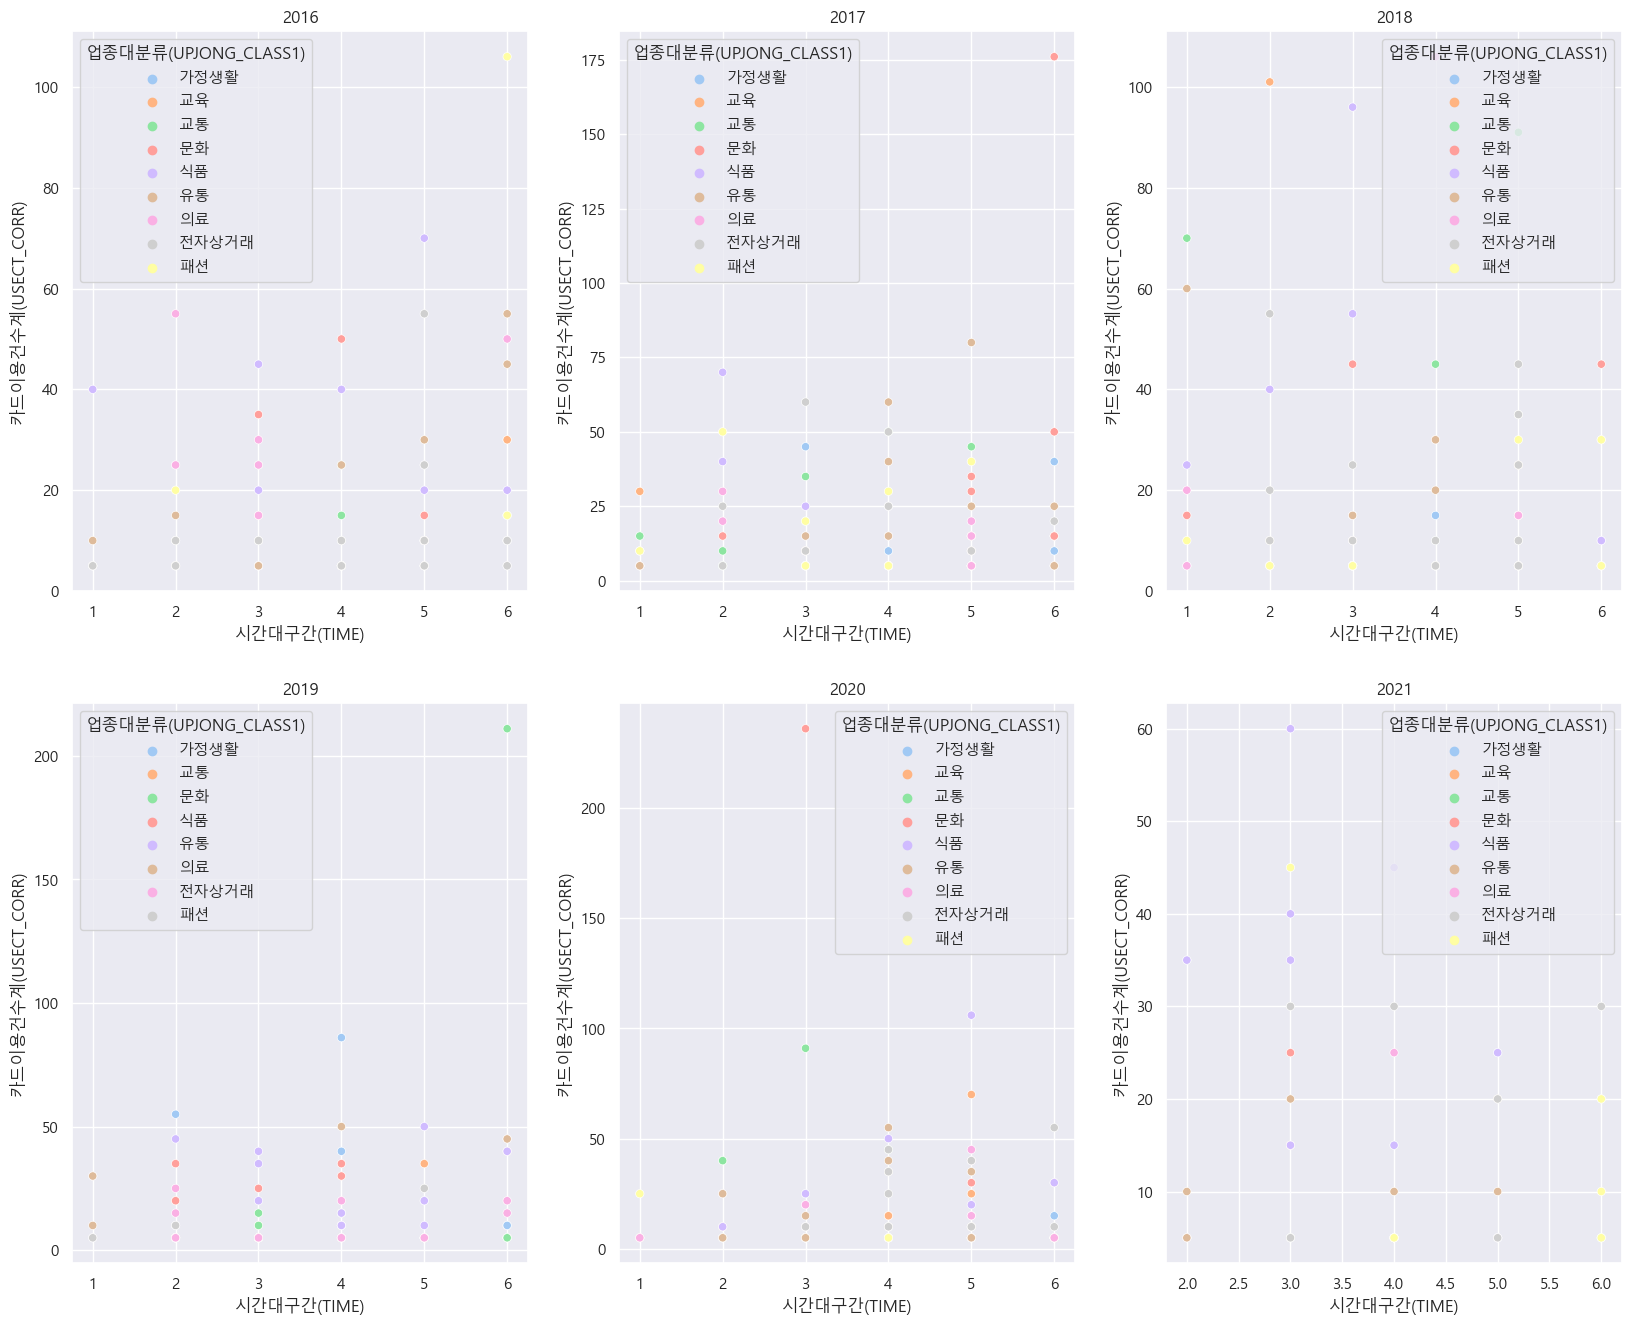

In [13]:
(fig,axes) =  plt.subplots(2,3,figsize = (20,16))

axes[0][0].set_title('2016')
sns.scatterplot(data=cdf3[cdf3['y']=='2016'], x='시간대구간(TIME)', y="카드이용건수계(USECT_CORR)",ax = axes[0][0],hue='업종대분류(UPJONG_CLASS1)',palette='pastel')

axes[0][1].set_title('2017')
sns.scatterplot(data=cdf3[cdf3['y']=='2017'], x='시간대구간(TIME)', y="카드이용건수계(USECT_CORR)", ax = axes[0][1],hue='업종대분류(UPJONG_CLASS1)',palette='pastel')

axes[0][2].set_title('2018')
sns.scatterplot(data=cdf3[cdf3['y']=='2018'], x='시간대구간(TIME)', y="카드이용건수계(USECT_CORR)", ax = axes[0][2],hue='업종대분류(UPJONG_CLASS1)',palette='pastel')

axes[1][0].set_title('2019')
sns.scatterplot(data=cdf3[cdf3['y']=='2019'], x='시간대구간(TIME)', y="카드이용건수계(USECT_CORR)", ax = axes[1][0],hue='업종대분류(UPJONG_CLASS1)',palette='pastel')

axes[1][1].set_title('2020')
sns.scatterplot(data=cdf3[cdf3['y']=='2020'], x='시간대구간(TIME)', y="카드이용건수계(USECT_CORR)", ax = axes[1][1],hue='업종대분류(UPJONG_CLASS1)',palette='pastel')

axes[1][2].set_title('2021')
sns.scatterplot(data=cdf3[cdf3['y']=='2021'], x='시간대구간(TIME)', y="카드이용건수계(USECT_CORR)", ax = axes[1][2],hue='업종대분류(UPJONG_CLASS1)',palette='pastel')

plt.show()


## 카드이용건수계약/월별로

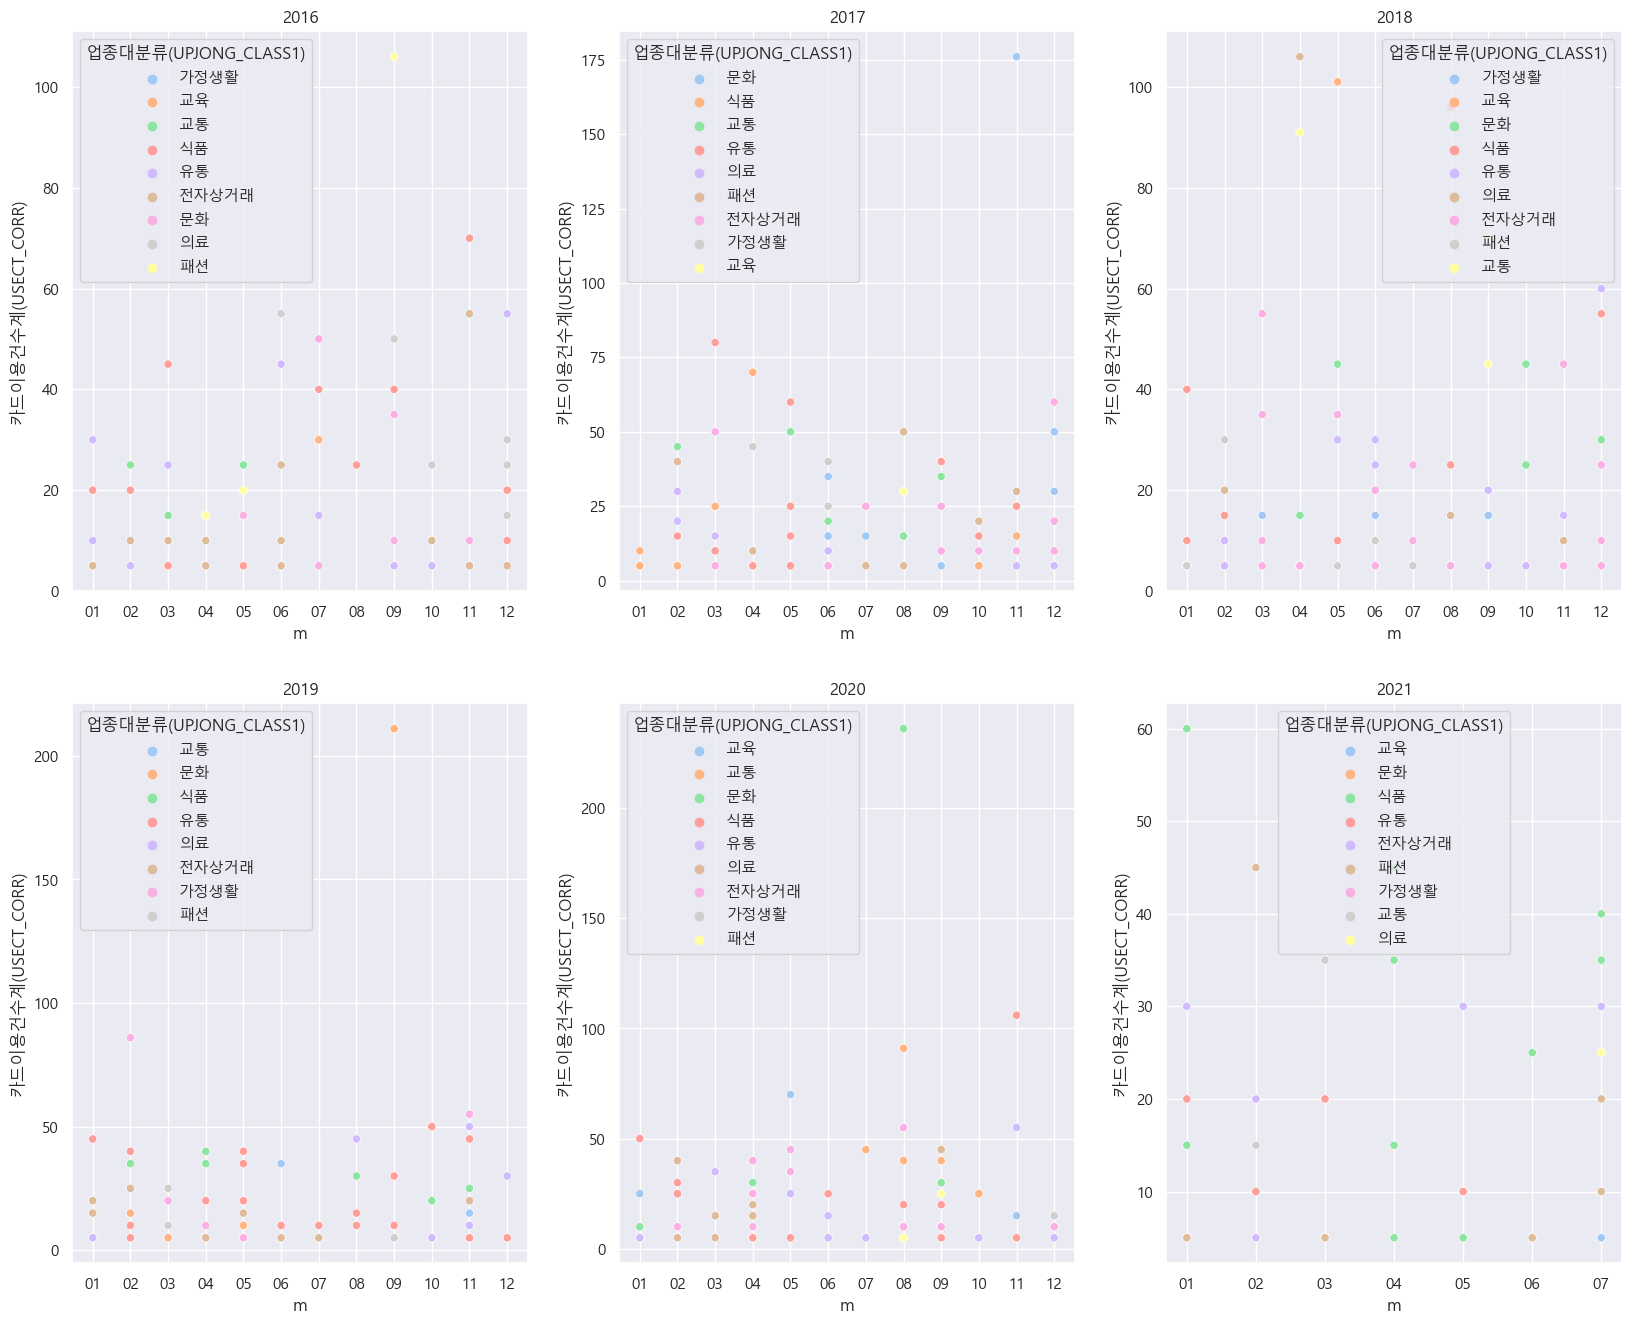

In [14]:
fig,axes =  plt.subplots(2,3,figsize = (20,16))

axes[0][0].set_title('2016')
sns.scatterplot(data=mdf16, x='m', y="카드이용건수계(USECT_CORR)", ax = axes[0][0],hue='업종대분류(UPJONG_CLASS1)',palette='pastel')

axes[0][1].set_title('2017')
sns.scatterplot(data=mdf17, x='m', y="카드이용건수계(USECT_CORR)", ax = axes[0][1],hue='업종대분류(UPJONG_CLASS1)',palette='pastel')

axes[0][2].set_title('2018')
sns.scatterplot(data=mdf18, x='m', y="카드이용건수계(USECT_CORR)", ax = axes[0][2],hue='업종대분류(UPJONG_CLASS1)',palette='pastel')

axes[1][0].set_title('2019')
sns.scatterplot(data=mdf19, x='m', y="카드이용건수계(USECT_CORR)", ax = axes[1][0],hue='업종대분류(UPJONG_CLASS1)',palette='pastel')

axes[1][1].set_title('2020')
sns.scatterplot(data=mdf20, x='m', y="카드이용건수계(USECT_CORR)", ax = axes[1][1],hue='업종대분류(UPJONG_CLASS1)',palette='pastel')

axes[1][2].set_title('2021')
sns.scatterplot(data=mdf21, x='m', y="카드이용건수계(USECT_CORR)", ax = axes[1][2],hue='업종대분류(UPJONG_CLASS1)',palette='pastel') 
plt.show()

#2016

## 카드이용금액계(AMT_CORR)/시간대별로

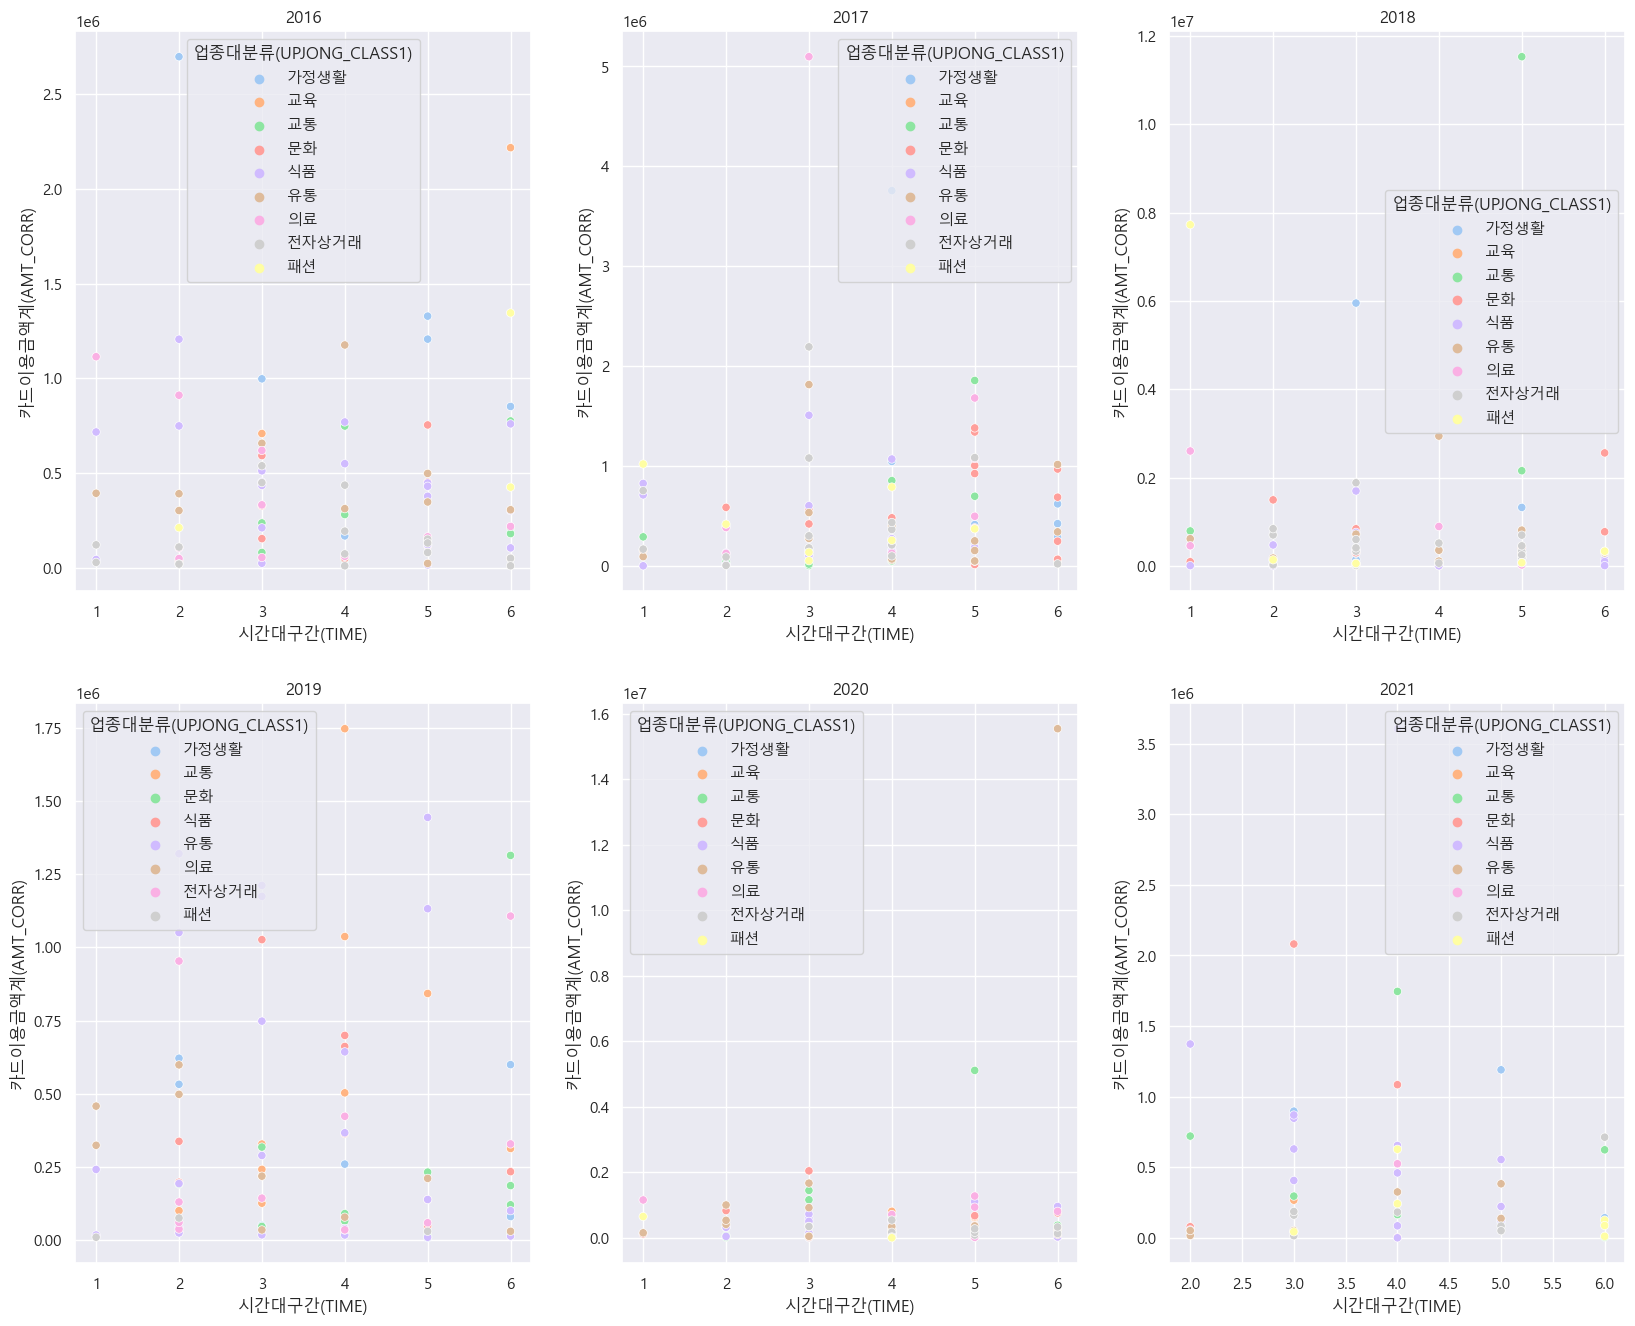

<Figure size 640x480 with 0 Axes>

In [15]:
fig,axes =  plt.subplots(2,3,figsize = (20,16))

axes[0][0].set_title('2016')
sns.scatterplot(data=cdf3[cdf3['y']=='2016'], x='시간대구간(TIME)', y="카드이용금액계(AMT_CORR)",ax = axes[0][0],hue='업종대분류(UPJONG_CLASS1)',palette='pastel')

axes[0][1].set_title('2017')
sns.scatterplot(data=cdf3[cdf3['y']=='2017'], x='시간대구간(TIME)', y="카드이용금액계(AMT_CORR)", ax = axes[0][1],hue='업종대분류(UPJONG_CLASS1)',palette='pastel')

axes[0][2].set_title('2018')
sns.scatterplot(data=cdf3[cdf3['y']=='2018'], x='시간대구간(TIME)', y="카드이용금액계(AMT_CORR)", ax = axes[0][2],hue='업종대분류(UPJONG_CLASS1)',palette='pastel')

axes[1][0].set_title('2019')
sns.scatterplot(data=cdf3[cdf3['y']=='2019'], x='시간대구간(TIME)', y="카드이용금액계(AMT_CORR)", ax = axes[1][0],hue='업종대분류(UPJONG_CLASS1)',palette='pastel')

axes[1][1].set_title('2020')
sns.scatterplot(data=cdf3[cdf3['y']=='2020'], x='시간대구간(TIME)', y="카드이용금액계(AMT_CORR)", ax = axes[1][1],hue='업종대분류(UPJONG_CLASS1)',palette='pastel')

axes[1][2].set_title('2021')
sns.scatterplot(data=cdf3[cdf3['y']=='2021'], x='시간대구간(TIME)', y="카드이용금액계(AMT_CORR)", ax = axes[1][2],hue='업종대분류(UPJONG_CLASS1)',palette='pastel')

plt.show()
plt.savefig('./금액_시간.png')

## 카드이용금액/월별로

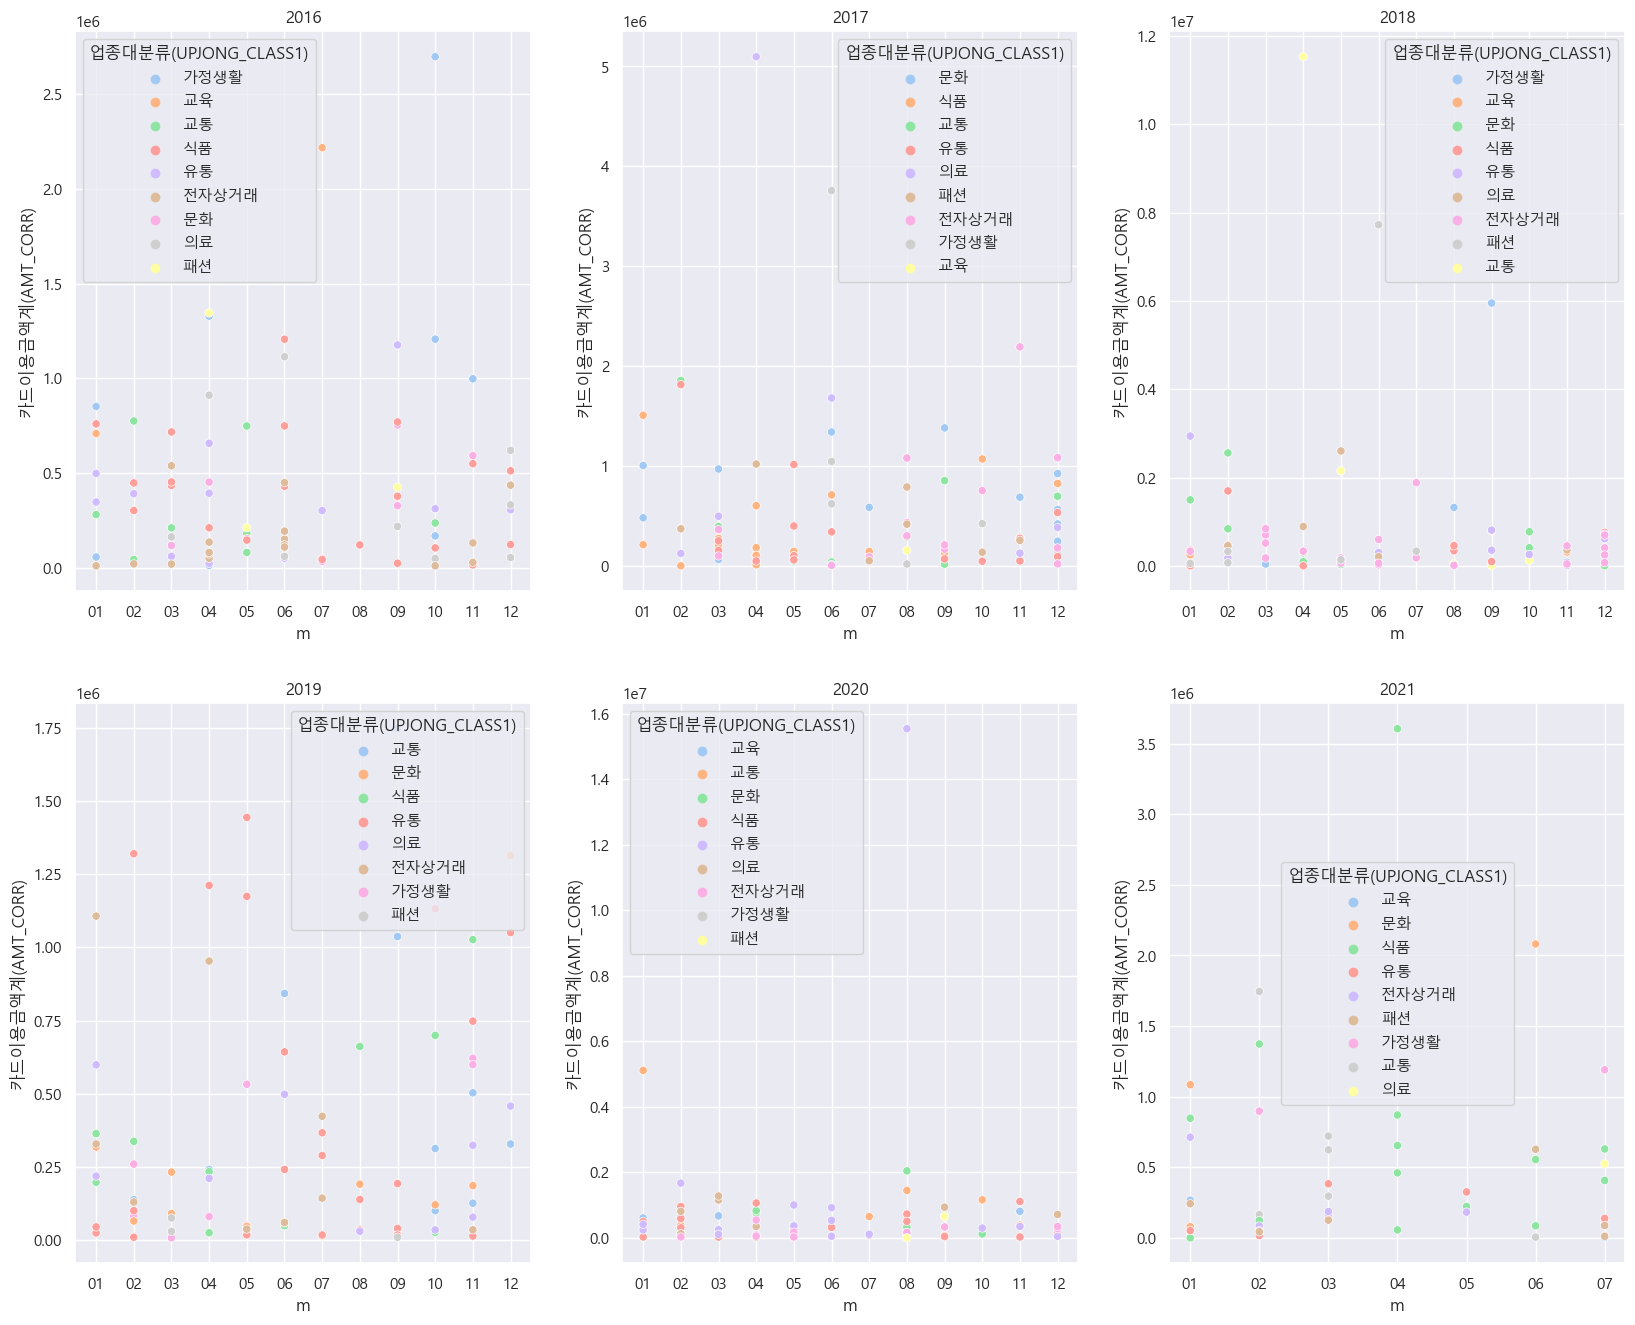

In [16]:
fig,axes =  plt.subplots(2,3,figsize = (20,16))

axes[0][0].set_title('2016')
sns.scatterplot(data=mdf16, x='m', y="카드이용금액계(AMT_CORR)", ax = axes[0][0],hue='업종대분류(UPJONG_CLASS1)',palette='pastel')

axes[0][1].set_title('2017')
sns.scatterplot(data=mdf17, x='m', y="카드이용금액계(AMT_CORR)", ax = axes[0][1],hue='업종대분류(UPJONG_CLASS1)',palette='pastel') 

axes[0][2].set_title('2018')
sns.scatterplot(data=mdf18, x='m', y="카드이용금액계(AMT_CORR)", ax = axes[0][2],hue='업종대분류(UPJONG_CLASS1)',palette='pastel')

axes[1][0].set_title('2019')
sns.scatterplot(data=mdf19, x='m', y="카드이용금액계(AMT_CORR)", ax = axes[1][0],hue='업종대분류(UPJONG_CLASS1)',palette='pastel') 

axes[1][1].set_title('2020')
sns.scatterplot(data=mdf20, x='m', y="카드이용금액계(AMT_CORR)", ax = axes[1][1],hue='업종대분류(UPJONG_CLASS1)',palette='pastel') 

axes[1][2].set_title('2021')
sns.scatterplot(data=mdf21, x='m', y="카드이용금액계(AMT_CORR)", ax = axes[1][2],hue='업종대분류(UPJONG_CLASS1)',palette='pastel') 
plt.show()

#2016

## 업종별/카드이용건수계약

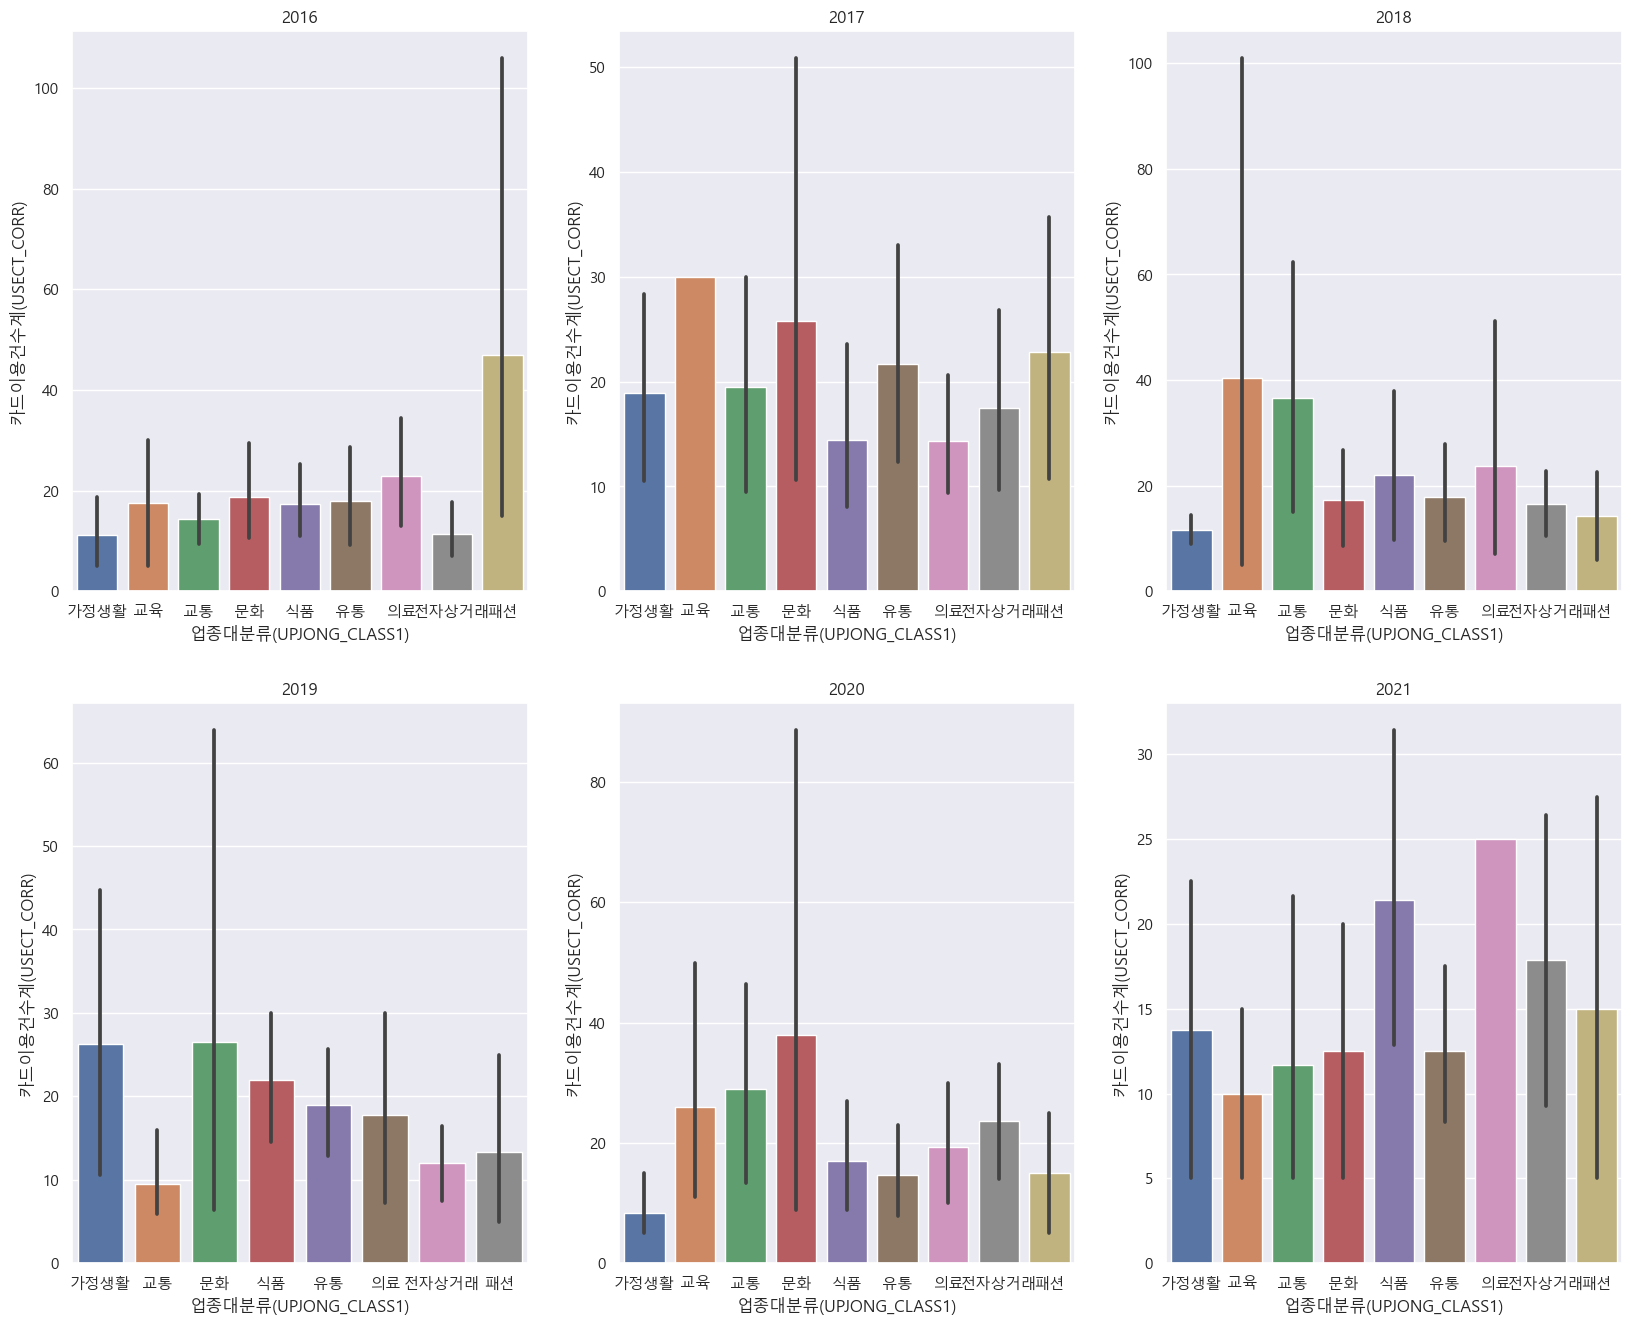

In [17]:
fig,axes =  plt.subplots(2,3,figsize = (20,16))

axes[0][0].set_title('2016')
sns.barplot(data=cdf16, x='업종대분류(UPJONG_CLASS1)', y="카드이용건수계(USECT_CORR)",ax = axes[0][0])

axes[0][1].set_title('2017')
sns.barplot(data=cdf17, x='업종대분류(UPJONG_CLASS1)', y="카드이용건수계(USECT_CORR)",ax = axes[0][1])

axes[0][2].set_title('2018')
sns.barplot(data=cdf18, x='업종대분류(UPJONG_CLASS1)', y="카드이용건수계(USECT_CORR)",ax = axes[0][2])

axes[1][0].set_title('2019')
sns.barplot(data=cdf19, x='업종대분류(UPJONG_CLASS1)', y="카드이용건수계(USECT_CORR)",ax = axes[1][0])

axes[1][1].set_title('2020')
sns.barplot(data=cdf20, x='업종대분류(UPJONG_CLASS1)', y="카드이용건수계(USECT_CORR)",ax = axes[1][1])

axes[1][2].set_title('2021')
sns.barplot(data=cdf21, x='업종대분류(UPJONG_CLASS1)', y="카드이용건수계(USECT_CORR)",ax = axes[1][2])


plt.show()


## 업종별/카드이용금액계(AMT_CORR) 

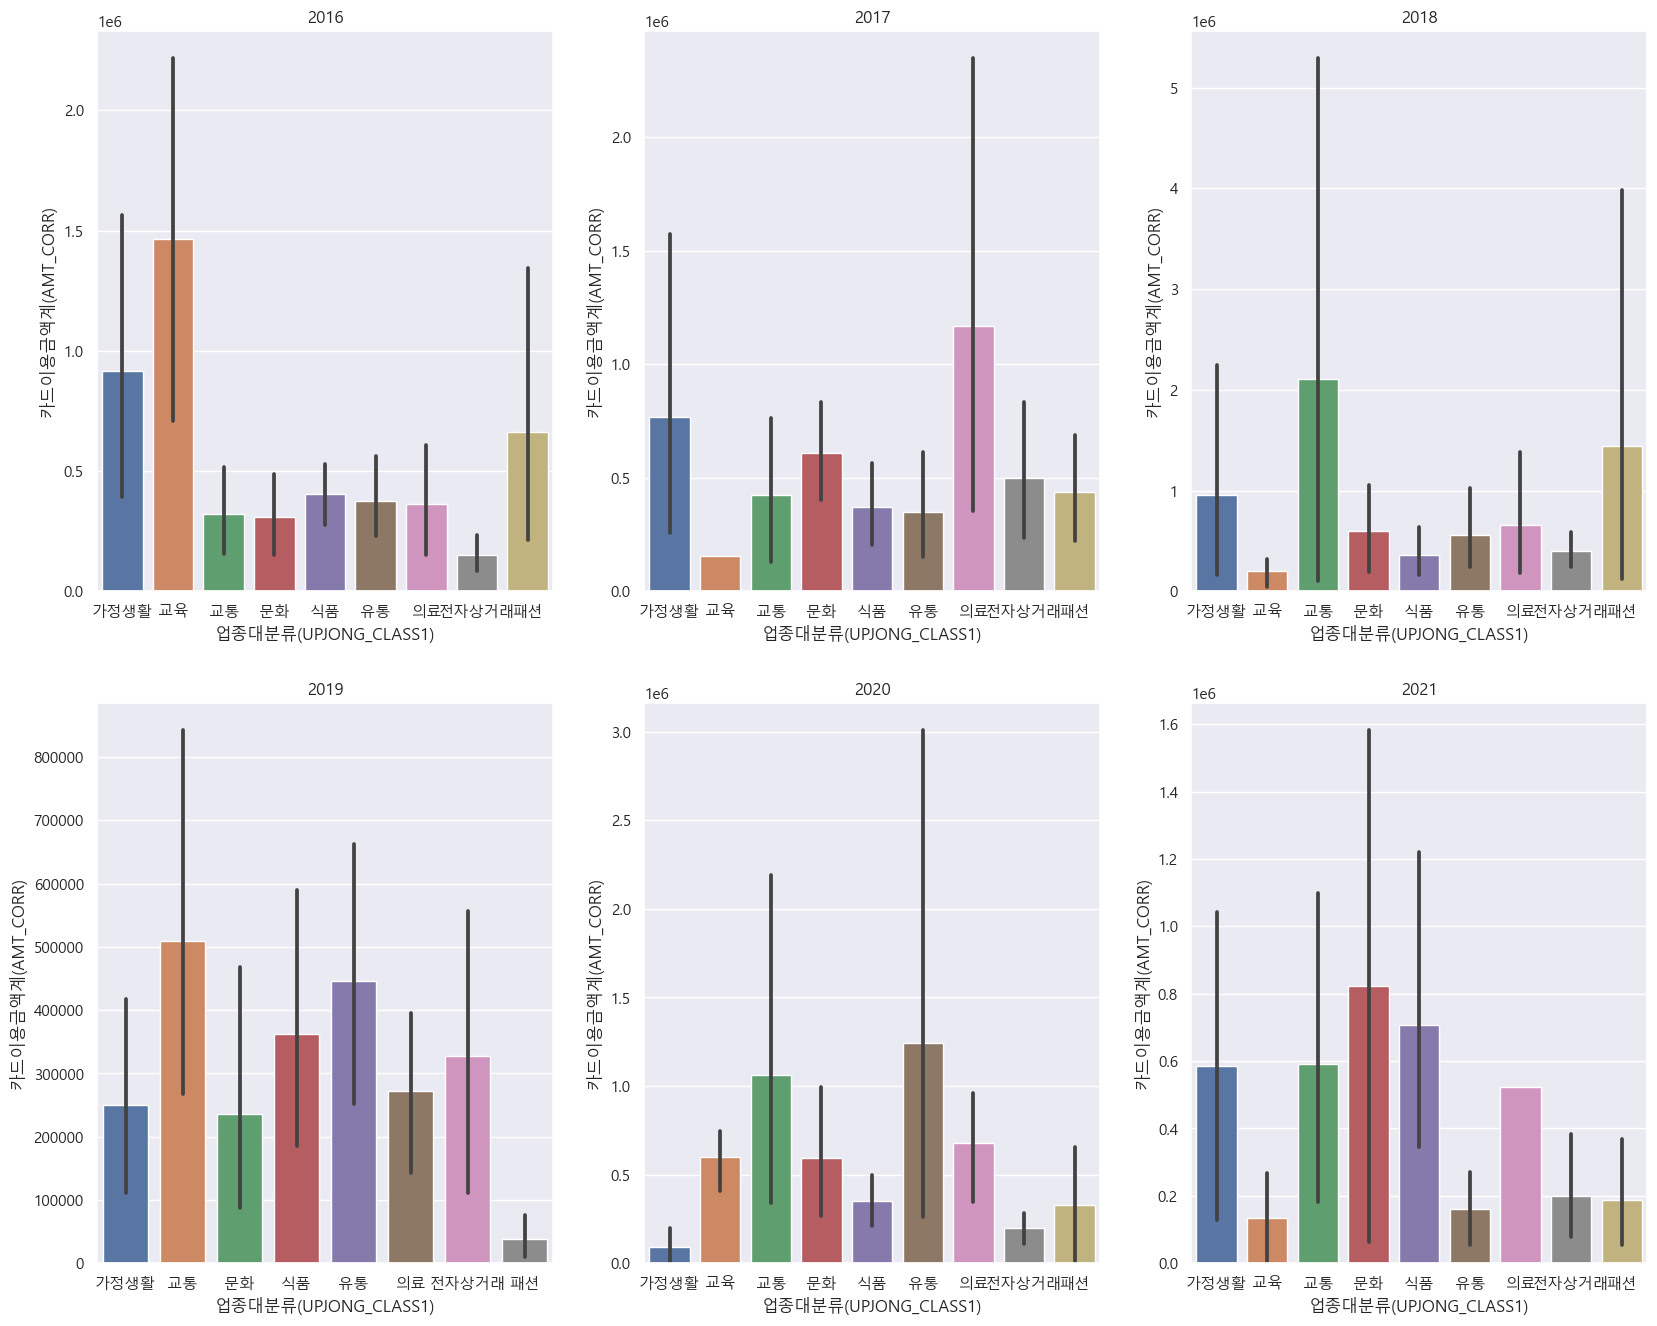

<Figure size 640x480 with 0 Axes>

In [18]:
fig,axes =  plt.subplots(2,3,figsize = (20,16))

axes[0][0].set_title('2016')
sns.barplot(data=cdf16, x='업종대분류(UPJONG_CLASS1)', y="카드이용금액계(AMT_CORR)",ax = axes[0][0])

axes[0][1].set_title('2017')
sns.barplot(data=cdf17, x='업종대분류(UPJONG_CLASS1)', y="카드이용금액계(AMT_CORR)",ax = axes[0][1])

axes[0][2].set_title('2018')
sns.barplot(data=cdf18, x='업종대분류(UPJONG_CLASS1)', y="카드이용금액계(AMT_CORR)",ax = axes[0][2])

axes[1][0].set_title('2019')
sns.barplot(data=cdf19, x='업종대분류(UPJONG_CLASS1)', y="카드이용금액계(AMT_CORR)",ax = axes[1][0])

axes[1][1].set_title('2020')
sns.barplot(data=cdf20, x='업종대분류(UPJONG_CLASS1)', y="카드이용금액계(AMT_CORR)",ax = axes[1][1])

axes[1][2].set_title('2021')
sns.barplot(data=cdf21, x='업종대분류(UPJONG_CLASS1)', y="카드이용금액계(AMT_CORR)",ax = axes[1][2])


plt.show()
plt.savefig('./금액_업종별.png')

## 업종별 / 시간대별/카드이용건수

In [19]:
df3['업종대분류(UPJONG_CLASS1)'].unique()

array(['식품', '유통', '문화', '의료', '교통', '가정생활', '전자상거래', '교육', '패션'],
      dtype=object)

In [20]:
df3.columns

Index(['업종대분류(UPJONG_CLASS1)', '기준일자(YMD)', '시간대구간(TIME)', '카드이용금액계(AMT_CORR)',
       '카드이용건수계(USECT_CORR)', 'y', 'm', 'd'],
      dtype='object')

In [21]:

gadf = mdf3[mdf3['업종대분류(UPJONG_CLASS1)']=='가정생활']
eddf = mdf3[mdf3['업종대분류(UPJONG_CLASS1)']=='교육']
trandf = mdf3[mdf3['업종대분류(UPJONG_CLASS1)']=='교통']
culdf = mdf3[mdf3['업종대분류(UPJONG_CLASS1)']=='문화']
fodf = mdf3[mdf3['업종대분류(UPJONG_CLASS1)']=='식품']
logisdf = mdf3[mdf3['업종대분류(UPJONG_CLASS1)']=='유통']
meddf = mdf3[mdf3['업종대분류(UPJONG_CLASS1)']=='의료']
onlinedf = mdf3[mdf3['업종대분류(UPJONG_CLASS1)']=='전자상거래']
fadf = mdf3[mdf3['업종대분류(UPJONG_CLASS1)']=='패션']


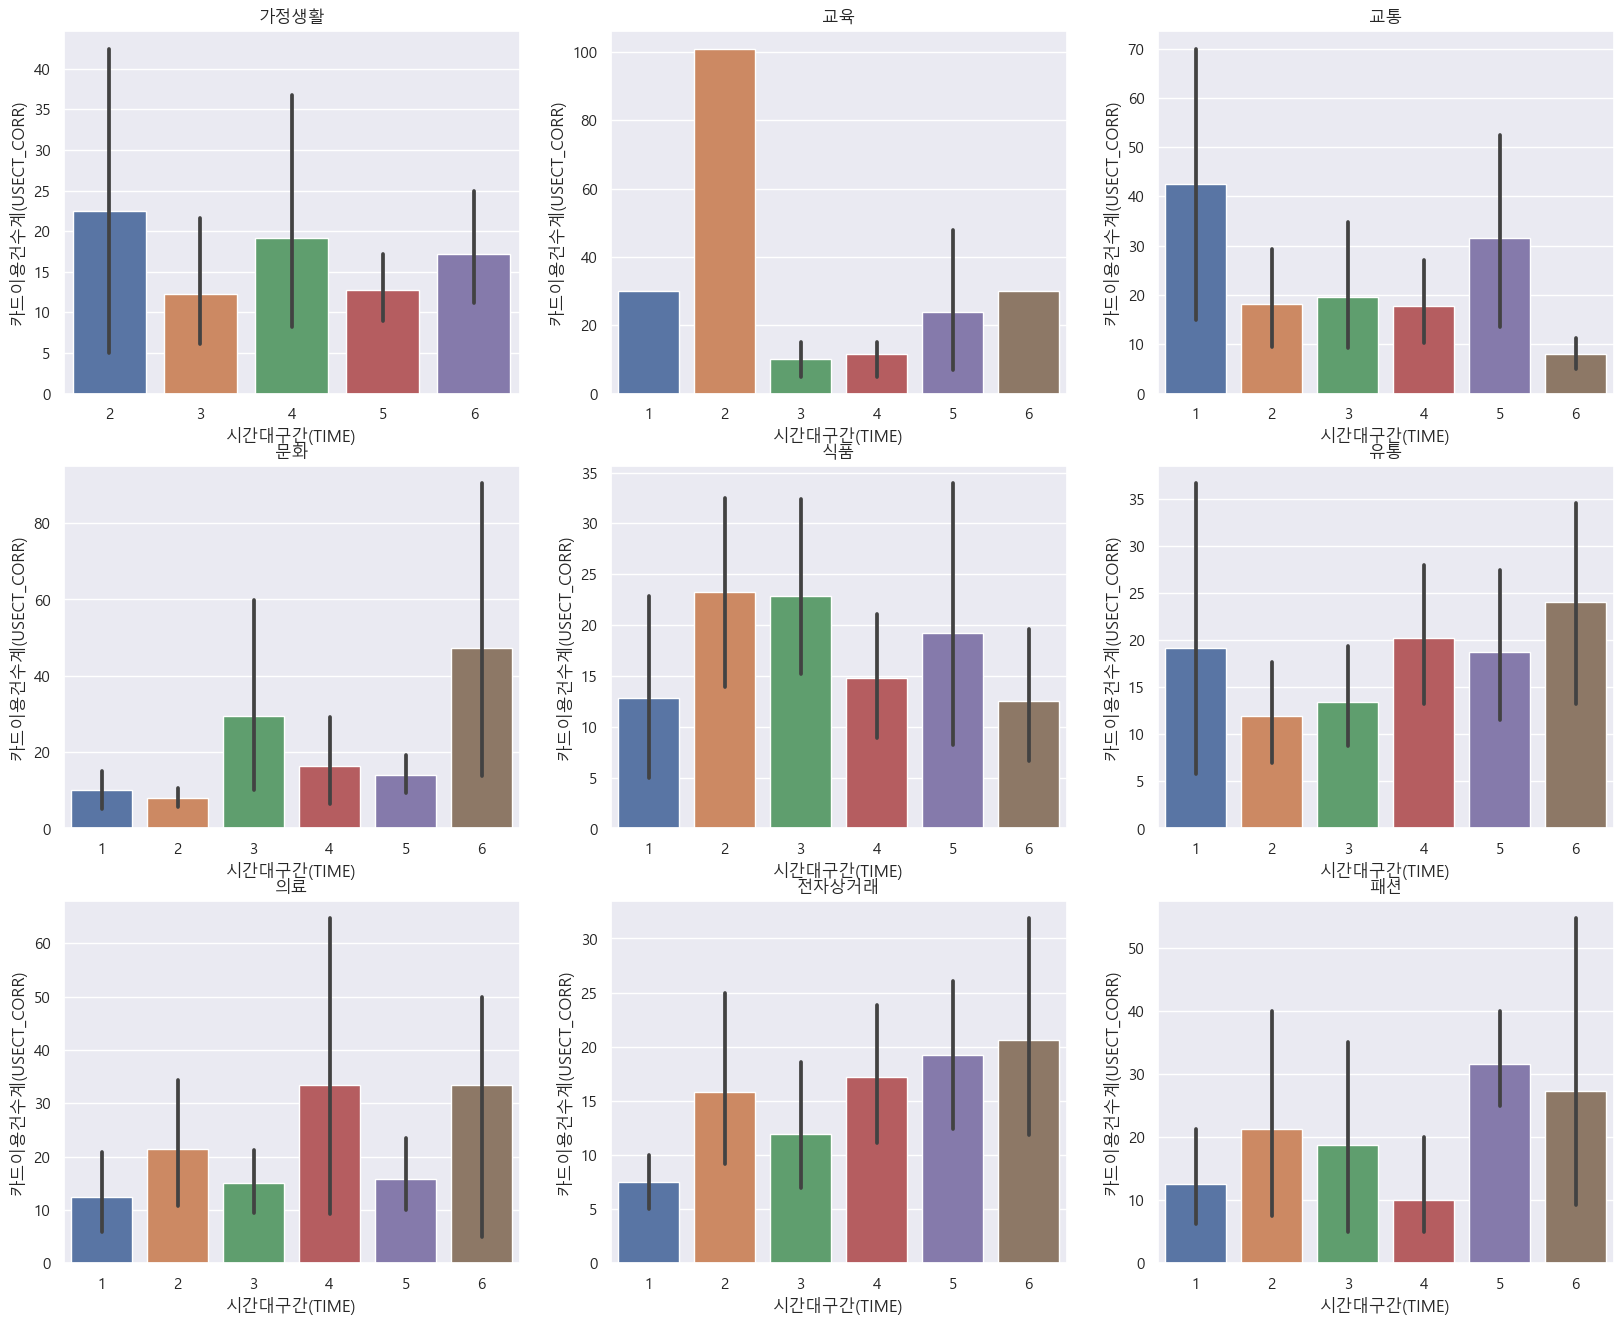

In [22]:
fig,axes =  plt.subplots(3,3,figsize = (20,16))

axes[0][0].set_title('가정생활')
sns.barplot(data = gadf, x = '시간대구간(TIME)', y = '카드이용건수계(USECT_CORR)', ax=axes[0][0])

axes[0][1].set_title('교육')
sns.barplot(data = eddf, x = '시간대구간(TIME)', y = '카드이용건수계(USECT_CORR)',ax=axes[0][1])

axes[0][2].set_title('교통')
sns.barplot(data = trandf, x = '시간대구간(TIME)', y = '카드이용건수계(USECT_CORR)', ax=axes[0][2])

axes[1][0].set_title('문화')
sns.barplot(data = culdf, x = '시간대구간(TIME)', y = '카드이용건수계(USECT_CORR)', ax=axes[1][0])

axes[1][1].set_title('식품')
sns.barplot(data = fodf, x = '시간대구간(TIME)', y = '카드이용건수계(USECT_CORR)', ax=axes[1][1])

axes[1][2].set_title('유통')
sns.barplot(data = logisdf, x = '시간대구간(TIME)', y = '카드이용건수계(USECT_CORR)', ax=axes[1][2])

axes[2][0].set_title('의료')
sns.barplot(data = meddf, x = '시간대구간(TIME)', y = '카드이용건수계(USECT_CORR)',ax=axes[2][0])

axes[2][1].set_title('전자상거래')
sns.barplot(data = onlinedf, x = '시간대구간(TIME)', y = '카드이용건수계(USECT_CORR)', ax=axes[2][1])

axes[2][2].set_title('패션')
sns.barplot(data = fadf, x = '시간대구간(TIME)', y = '카드이용건수계(USECT_CORR)', ax=axes[2][2])
plt.show()


## 업종별 / 월별/카드이용건수

array(['가정생활', '교육', '교통', '문화', '식품', '유통', '의료', '전자상거래', '패션'],
      dtype=object)

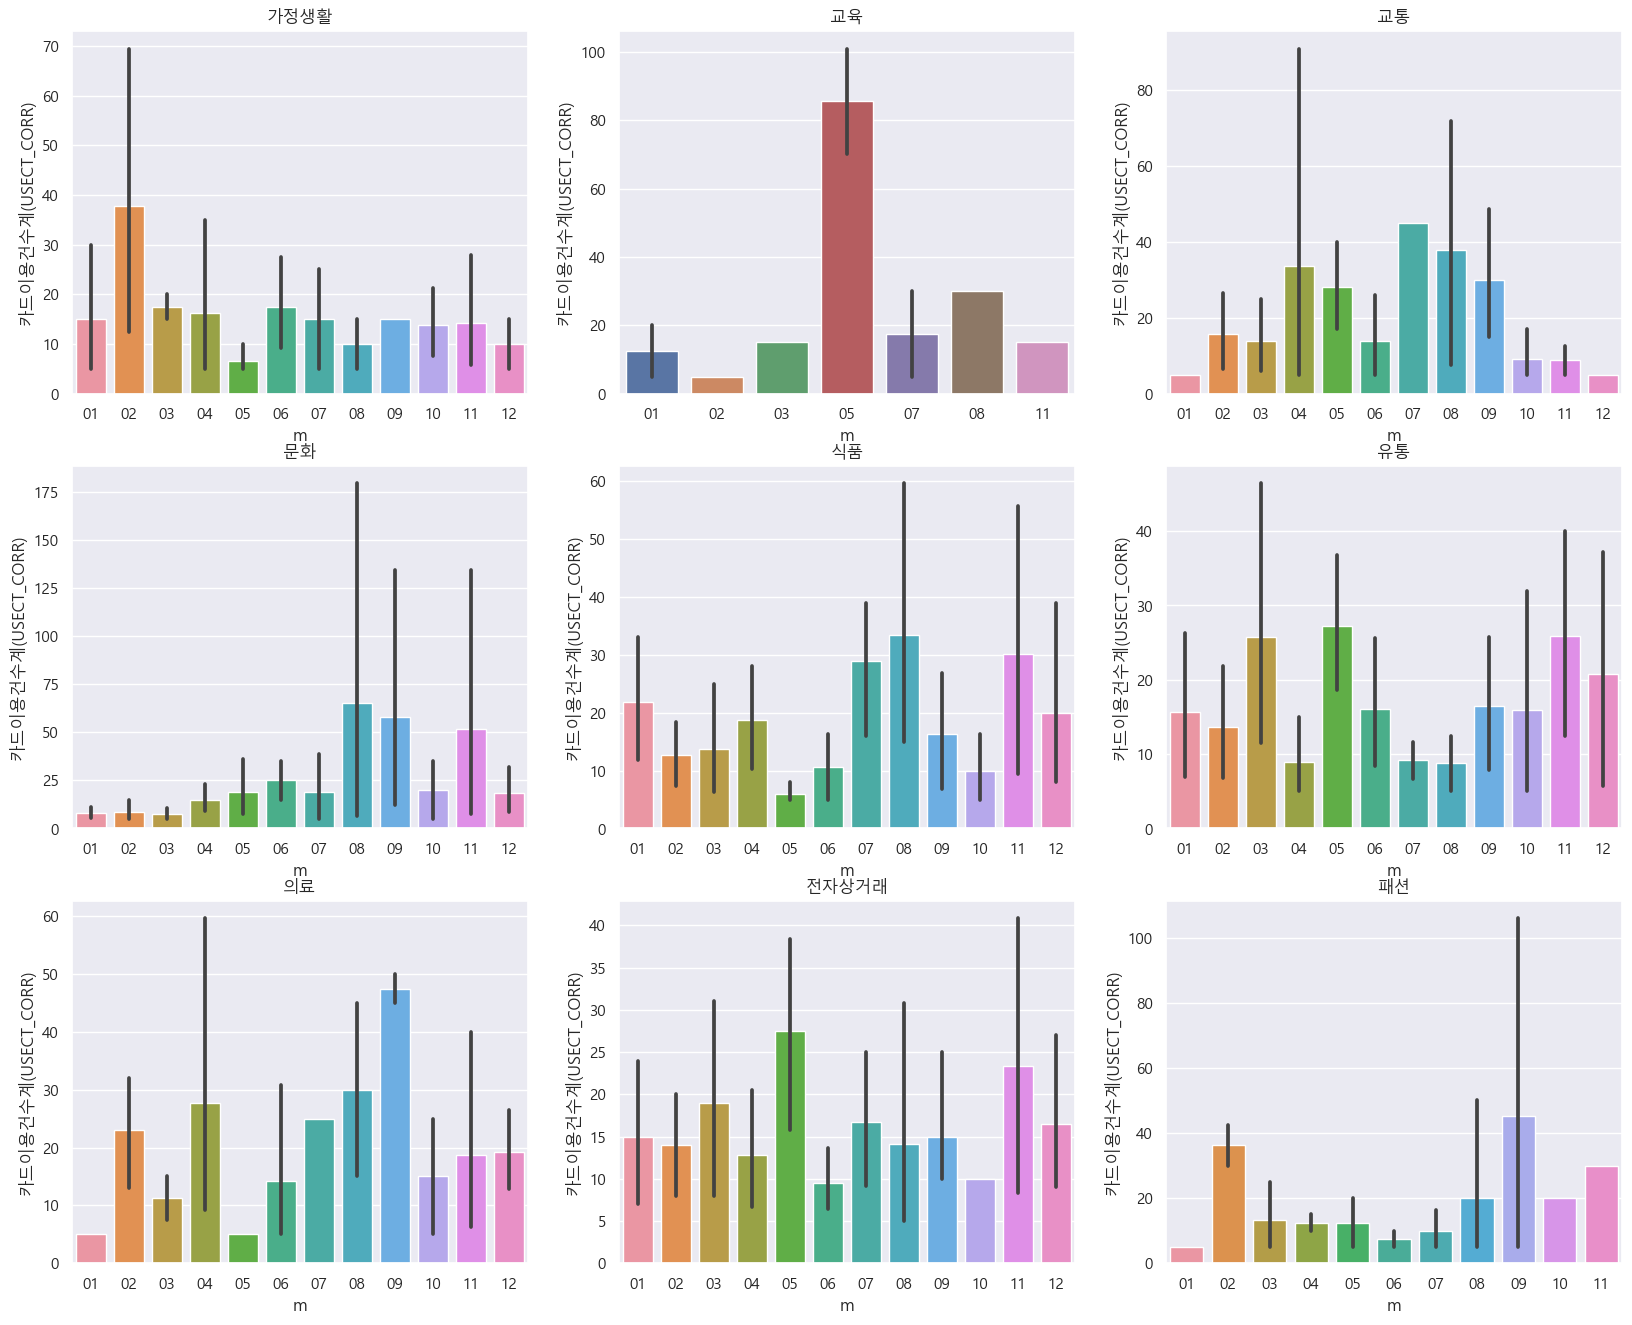

In [23]:
fig,axes =  plt.subplots(3,3,figsize = (20,16))
axes[0][0].set_title('가정생활')
sns.barplot(data = gadf, x = 'm', y = '카드이용건수계(USECT_CORR)', ax=axes[0][0])

axes[0][1].set_title('교육')
sns.barplot(data = eddf, x = 'm', y = '카드이용건수계(USECT_CORR)', ax=axes[0][1])

axes[0][2].set_title('교통')
sns.barplot(data = trandf, x = 'm', y = '카드이용건수계(USECT_CORR)', ax=axes[0][2])

axes[1][0].set_title('문화')
sns.barplot(data = culdf, x = 'm', y = '카드이용건수계(USECT_CORR)', ax=axes[1][0])

axes[1][1].set_title('식품')
sns.barplot(data = fodf, x = 'm', y = '카드이용건수계(USECT_CORR)', ax=axes[1][1])

axes[1][2].set_title('유통')
sns.barplot(data = logisdf, x = 'm', y = '카드이용건수계(USECT_CORR)', ax=axes[1][2])

axes[2][0].set_title('의료')
sns.barplot(data = meddf, x = 'm', y = '카드이용건수계(USECT_CORR)', ax=axes[2][0])

axes[2][1].set_title('전자상거래')
sns.barplot(data = onlinedf, x = 'm', y = '카드이용건수계(USECT_CORR)', ax=axes[2][1])

axes[2][2].set_title('패션')
sns.barplot(data = fadf, x = 'm', y = '카드이용건수계(USECT_CORR)', ax=axes[2][2])
plt.show()


## 업종별 / 시간대별/'카드이용금액계(AMT_CORR)'

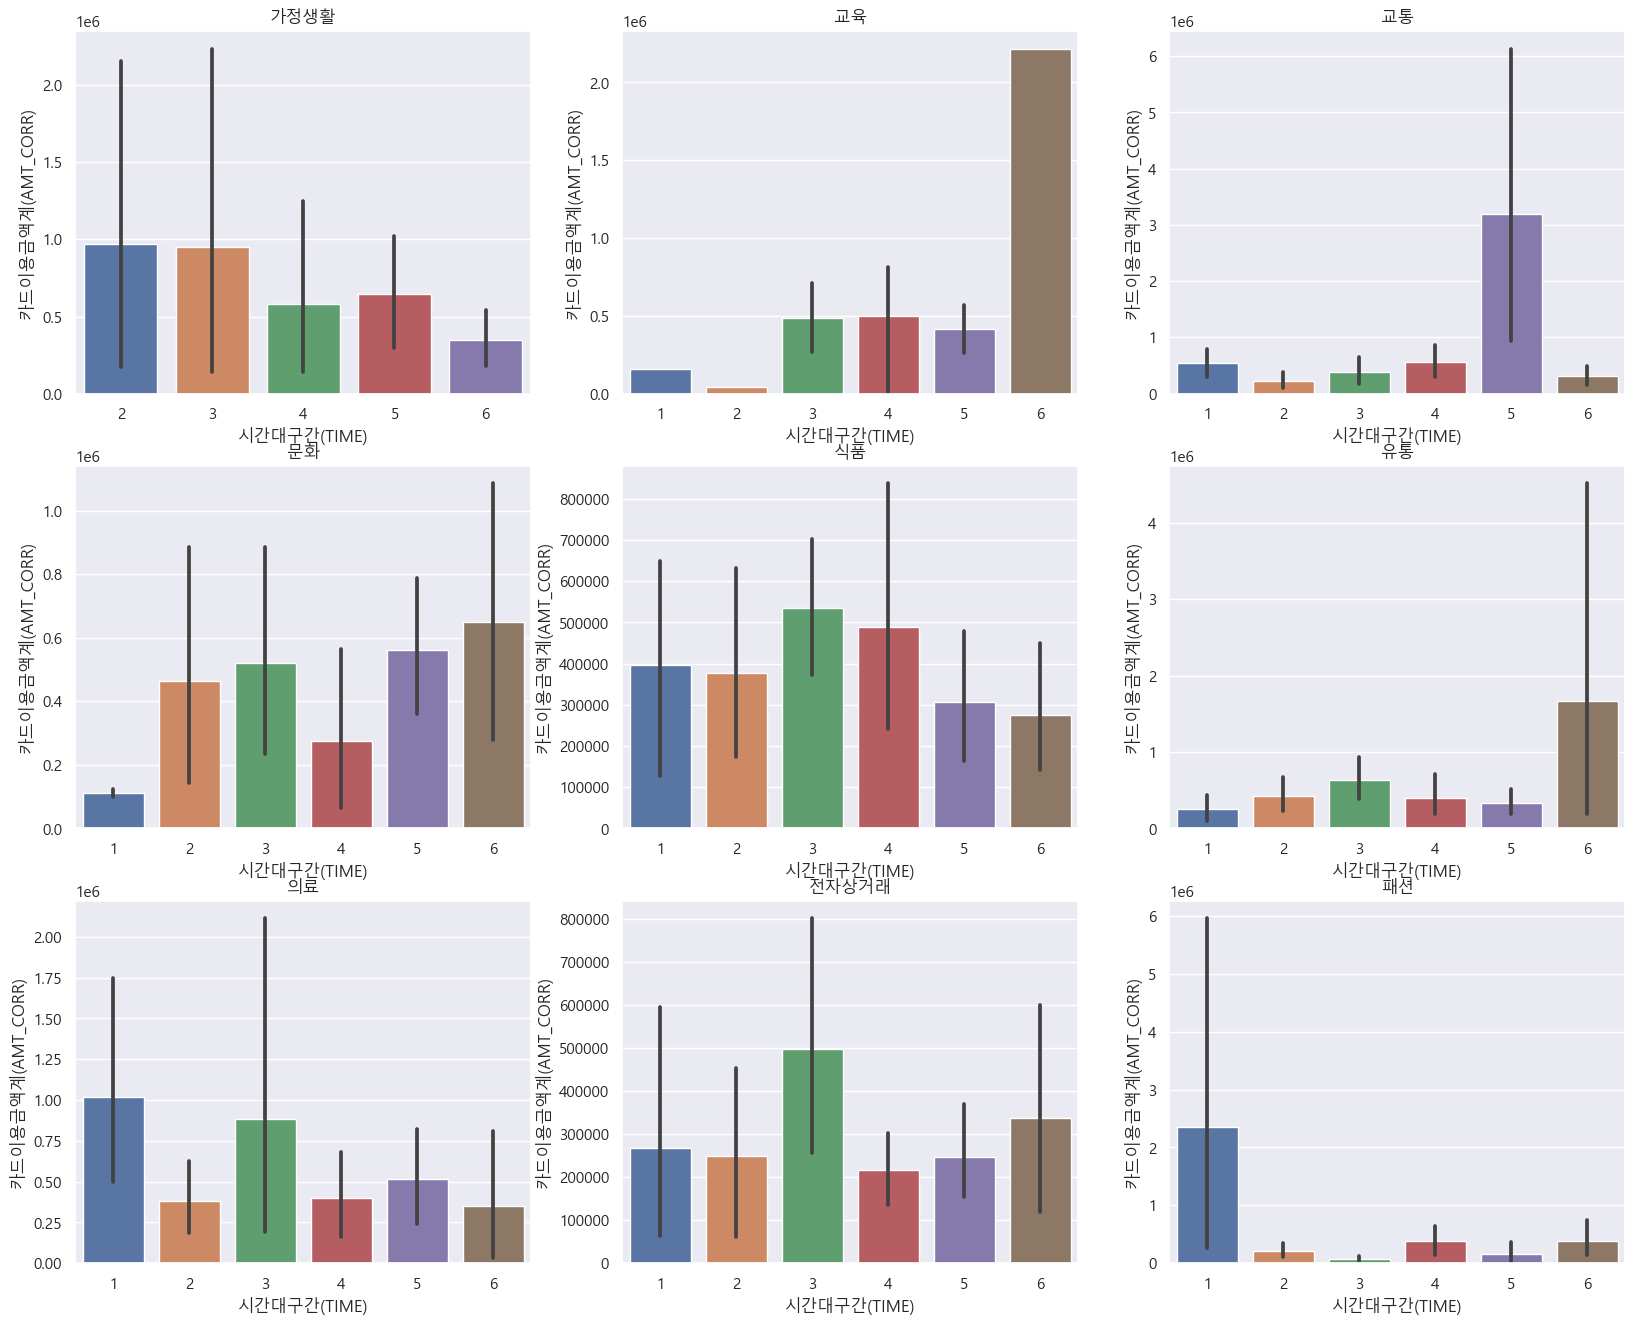

In [24]:
fig,axes =  plt.subplots(3,3,figsize = (20,16))

axes[0][0].set_title('가정생활')
sns.barplot(data = gadf, x = '시간대구간(TIME)', y = '카드이용금액계(AMT_CORR)', ax=axes[0][0])

axes[0][1].set_title('교육')
sns.barplot(data = eddf, x = '시간대구간(TIME)', y = '카드이용금액계(AMT_CORR)', ax=axes[0][1])

axes[0][2].set_title('교통')
sns.barplot(data = trandf, x = '시간대구간(TIME)', y = '카드이용금액계(AMT_CORR)', ax=axes[0][2])

axes[1][0].set_title('문화')
sns.barplot(data = culdf, x = '시간대구간(TIME)', y = '카드이용금액계(AMT_CORR)', ax=axes[1][0])

axes[1][1].set_title('식품')
sns.barplot(data = fodf, x = '시간대구간(TIME)', y = '카드이용금액계(AMT_CORR)', ax=axes[1][1])

axes[1][2].set_title('유통')
sns.barplot(data = logisdf, x = '시간대구간(TIME)', y = '카드이용금액계(AMT_CORR)', ax=axes[1][2])

axes[2][0].set_title('의료')
sns.barplot(data = meddf, x = '시간대구간(TIME)', y = '카드이용금액계(AMT_CORR)', ax=axes[2][0])

axes[2][1].set_title('전자상거래')
sns.barplot(data = onlinedf, x = '시간대구간(TIME)', y = '카드이용금액계(AMT_CORR)', ax=axes[2][1])

axes[2][2].set_title('패션')
sns.barplot(data = fadf, x = '시간대구간(TIME)', y = '카드이용금액계(AMT_CORR)', ax=axes[2][2])
plt.show()


## 업종별 / 월별/'카드이용금액계(AMT_CORR)'

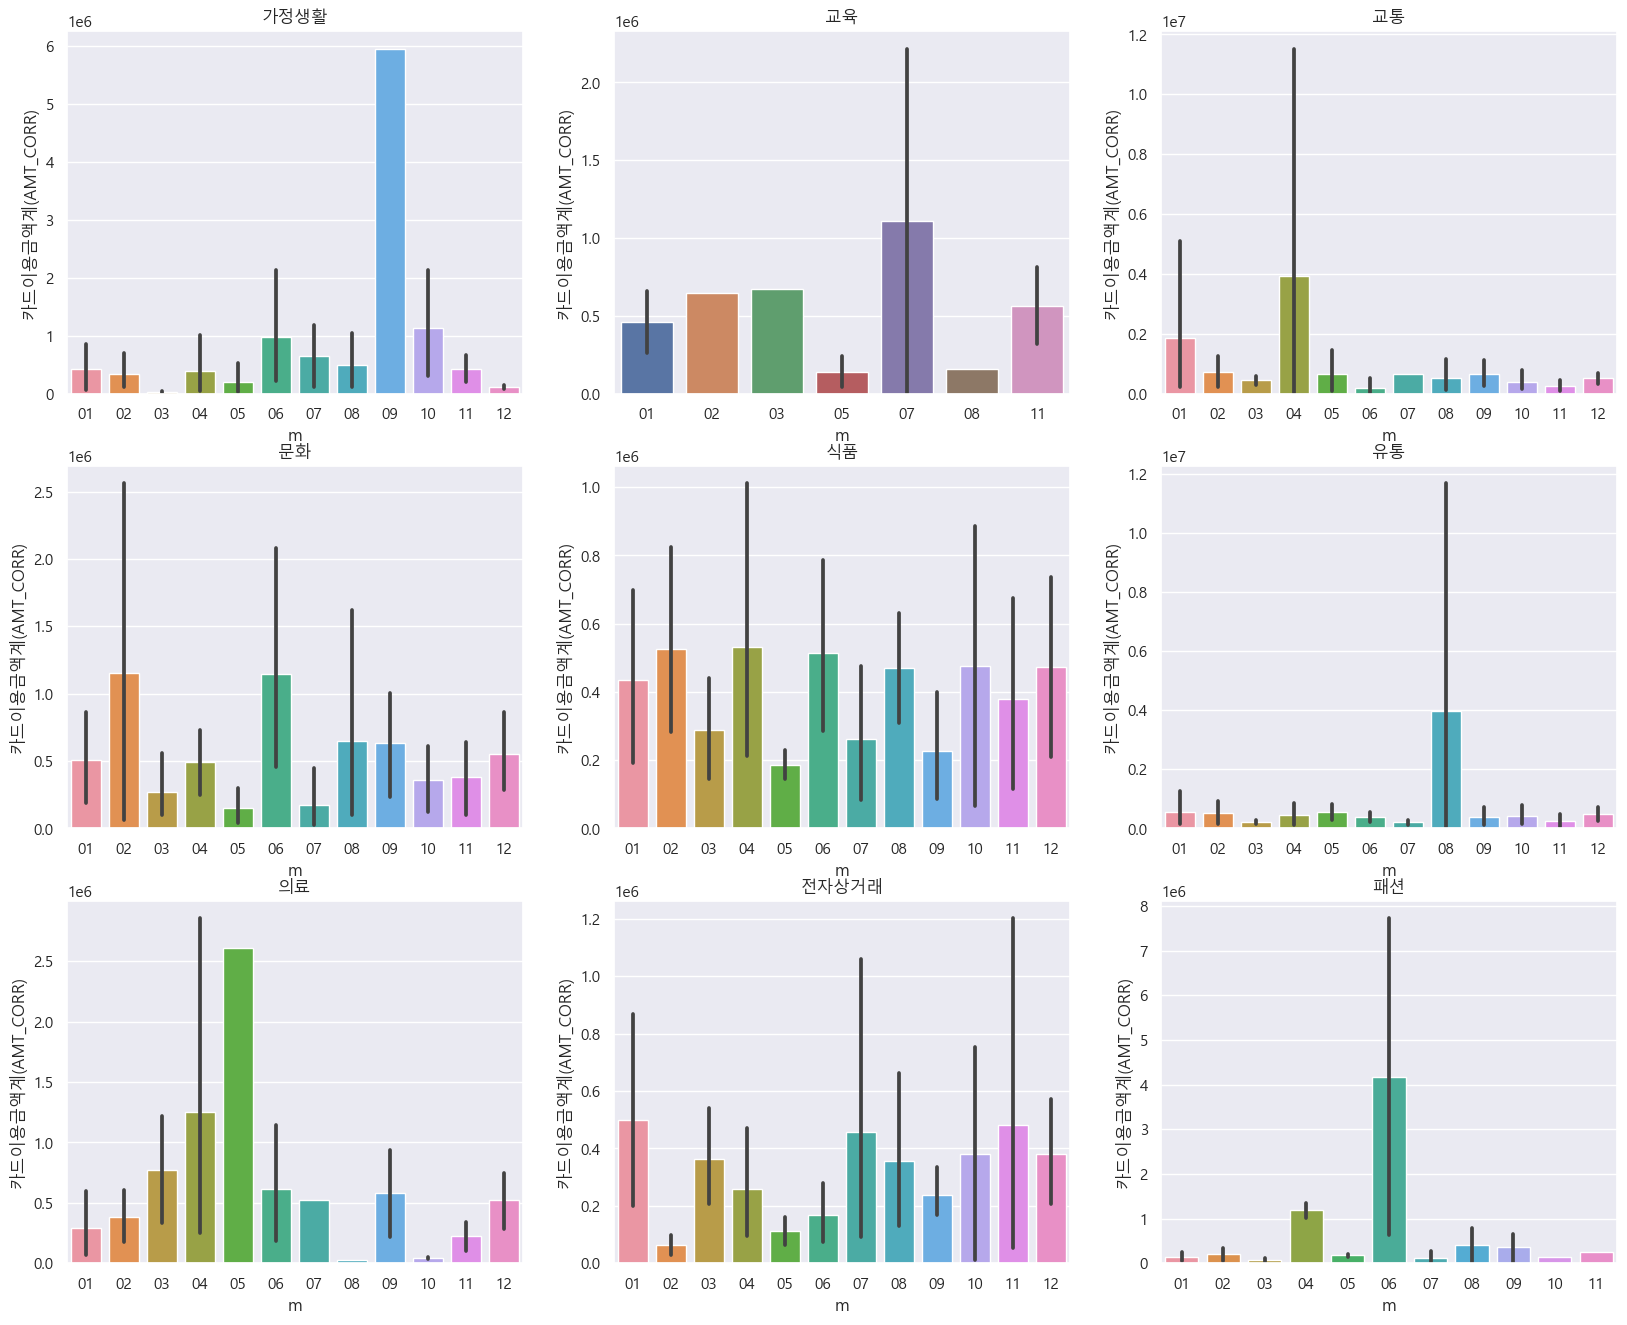

In [25]:
fig,axes =  plt.subplots(3,3,figsize = (20,16))

axes[0][0].set_title('가정생활')
sns.barplot(data = gadf, x = 'm', y = '카드이용금액계(AMT_CORR)', ax=axes[0][0])

axes[0][1].set_title('교육')
sns.barplot(data = eddf, x = 'm', y = '카드이용금액계(AMT_CORR)', ax=axes[0][1])

axes[0][2].set_title('교통')
sns.barplot(data = trandf, x = 'm', y = '카드이용금액계(AMT_CORR)', ax=axes[0][2])

axes[1][0].set_title('문화')
sns.barplot(data = culdf, x = 'm', y = '카드이용금액계(AMT_CORR)', ax=axes[1][0])

axes[1][1].set_title('식품')
sns.barplot(data = fodf, x = 'm', y = '카드이용금액계(AMT_CORR)', ax=axes[1][1])

axes[1][2].set_title('유통')
sns.barplot(data = logisdf, x = 'm', y = '카드이용금액계(AMT_CORR)', ax=axes[1][2])

axes[2][0].set_title('의료')
sns.barplot(data = meddf, x = 'm', y = '카드이용금액계(AMT_CORR)', ax=axes[2][0])

axes[2][1].set_title('전자상거래')
sns.barplot(data = onlinedf, x = 'm', y = '카드이용금액계(AMT_CORR)', ax=axes[2][1])

axes[2][2].set_title('패션')
sns.barplot(data = fadf, x = 'm', y = '카드이용금액계(AMT_CORR)', ax=axes[2][2])
plt.show()

# pivot_table

In [26]:
df3.columns

Index(['업종대분류(UPJONG_CLASS1)', '기준일자(YMD)', '시간대구간(TIME)', '카드이용금액계(AMT_CORR)',
       '카드이용건수계(USECT_CORR)', 'y', 'm', 'd'],
      dtype='object')

In [27]:
pt1 = pd.pivot_table(df3,                # 피벗할 데이터프레임
                     index = '시간대구간(TIME)',    # 행 위치에 들어갈 열
                     columns = '업종대분류(UPJONG_CLASS1)',    # 열 위치에 들어갈 열
                     values = '카드이용건수계(USECT_CORR)',     # 데이터로 사용할 열
                     aggfunc = 'mean')   # 데이터 집계함수


pt1

업종대분류(UPJONG_CLASS1),가정생활,교육,교통,문화,식품,유통,의료,전자상거래,패션
시간대구간(TIME),,,,,,,,,
1,NaN,30.000000,42.500000,10.000000,12.857143,19.166667,12.500000,7.500000,12.500000
2,22.500000,101.000000,18.125000,7.857143,23.214286,11.923077,21.428571,15.833333,21.250000
3,12.222222,10.000000,19.666667,29.400000,22.840000,13.437500,15.000000,11.944444,18.750000
4,19.181818,11.666667,17.857143,16.428571,14.772727,20.250000,33.500000,17.222222,10.000000
5,12.777778,24.000000,31.571429,14.000000,19.176471,18.750000,15.769231,19.210526,31.666667
6,17.222222,30.000000,8.125000,47.250000,12.500000,24.090909,33.333333,20.625000,27.285714


In [28]:
pt2 = pd.pivot_table(df3,                # 피벗할 데이터프레임
                     index = '시간대구간(TIME)',    # 행 위치에 들어갈 열
                     columns = '업종대분류(UPJONG_CLASS1)',    # 열 위치에 들어갈 열
                     values = '카드이용금액계(AMT_CORR)',     # 데이터로 사용할 열
                     aggfunc = 'sum')   # 데이터 집계함수
pt2

업종대분류(UPJONG_CLASS1),가정생활,교육,교통,문화,식품,유통,의료,전자상거래,패션
시간대구간(TIME),,,,,,,,,
1,NaN,157439.0,1086530.0,221873.0,2770122.0,1521661.0,6119765.0,1072346.0,9412589.0
2,3872320.0,40139.0,1792894.0,3243595.0,5269649.0,5533609.0,2670930.0,3004268.0,846599.0
3,8553204.0,975317.0,4557503.0,7821267.0,13360210.0,10214447.0,7074440.0,8965760.0,291388.0
4,6362090.0,1489333.0,7968728.0,1931721.0,10771600.0,7946838.0,2403083.0,3888441.0,1920655.0
5,5832336.0,2069342.0,22338059.0,8427452.0,5226604.0,6608877.0,6675841.0,4681914.0,477850.0
6,3106930.0,2218230.0,2543761.0,7785299.0,3315223.0,18320065.0,1060510.0,2701161.0,2659763.0


# Outlier처리

## Outlier 확인

In [29]:
df3.columns

Index(['업종대분류(UPJONG_CLASS1)', '기준일자(YMD)', '시간대구간(TIME)', '카드이용금액계(AMT_CORR)',
       '카드이용건수계(USECT_CORR)', 'y', 'm', 'd'],
      dtype='object')

In [30]:
df3[df3['y']=='2016'].groupby('업종대분류(UPJONG_CLASS1)')[['카드이용금액계(AMT_CORR)',
        'y', 'm', 'd']].max()


,카드이용금액계(AMT_CORR),y,m,d
업종대분류(UPJONG_CLASS1),,,,
가정생활,2698771,2016,11,28
교육,2218230,2016,07,23
교통,774972,2016,10,24
문화,753896,2016,11,31
식품,1206697,2016,12,29
유통,1176301,2016,12,30
의료,1114296,2016,12,29
전자상거래,538210,2016,12,30
패션,1345575,2016,09,21


In [31]:
df3[df3['y']=='2017'].groupby('업종대분류(UPJONG_CLASS1)')[['카드이용금액계(AMT_CORR)',
        'y', 'm', 'd']].max()


,카드이용금액계(AMT_CORR),y,m,d
업종대분류(UPJONG_CLASS1),,,,
가정생활,3757410,2017,12,30
교육,157439,2017,08,24
교통,1857328,2017,12,29
문화,1381982,2017,12,30
식품,1509000,2017,12,27
유통,1815830,2017,12,31
의료,5098006,2017,12,19
전자상거래,2193432,2017,12,29
패션,1020587,2017,11,25


In [32]:
df3[df3['y']=='2018'].groupby('업종대분류(UPJONG_CLASS1)')[['카드이용금액계(AMT_CORR)',
        'y', 'm', 'd']].max()


,카드이용금액계(AMT_CORR),y,m,d
업종대분류(UPJONG_CLASS1),,,,
가정생활,5954202,2018,11,26
교육,316890,2018,11,16
교통,11531979,2018,10,31
문화,2561276,2018,12,28
식품,1700140,2018,12,27
유통,2942651,2018,12,30
의료,2605002,2018,11,22
전자상거래,1886250,2018,12,30
패션,7728042,2018,07,28


In [33]:
df3[df3['y']=='2019'].groupby('업종대분류(UPJONG_CLASS1)')[['카드이용금액계(AMT_CORR)',
        'y', 'm', 'd']].max()


,카드이용금액계(AMT_CORR),y,m,d
업종대분류(UPJONG_CLASS1),,,,
가정생활,621205,2019,11,30
교통,1746466,2019,12,27
문화,1313836,2019,12,28
식품,1026120,2019,11,29
유통,1443610,2019,12,27
의료,598570,2019,12,29
전자상거래,1106600,2019,11,31
패션,75601,2019,09,30


In [34]:
df3[df3['y']=='2020'].groupby('업종대분류(UPJONG_CLASS1)')[['카드이용금액계(AMT_CORR)',
        'y', 'm', 'd']].max()


,카드이용금액계(AMT_CORR),y,m,d
업종대분류(UPJONG_CLASS1),,,,
가정생활,199087,2020,12,31
교육,813351,2020,11,15
교통,5111989,2020,11,31
문화,2046878,2020,10,16
식품,1112244,2020,12,30
유통,15536815,2020,12,31
의료,1279431,2020,12,24
전자상거래,547264,2020,12,31
패션,653900,2020,09,27


In [35]:
df3[df3['y']=='2021'].groupby('업종대분류(UPJONG_CLASS1)')[['카드이용금액계(AMT_CORR)',
        'y', 'm', 'd']].max()


,카드이용금액계(AMT_CORR),y,m,d
업종대분류(UPJONG_CLASS1),,,,
가정생활,1190048,2021,07,31
교육,266590,2021,07,14
교통,1745360,2021,06,25
문화,2081062,2021,06,19
식품,3606309,2021,07,31
유통,382592,2021,07,27
의료,524528,2021,07,04
전자상거래,712701,2021,07,30
패션,627090,2021,07,28


## Outlier 삭제

In [36]:
df3.columns

Index(['업종대분류(UPJONG_CLASS1)', '기준일자(YMD)', '시간대구간(TIME)', '카드이용금액계(AMT_CORR)',
       '카드이용건수계(USECT_CORR)', 'y', 'm', 'd'],
      dtype='object')

In [37]:
# df3[(df3['y']=='2016') & (df3['업종대분류(UPJONG_CLASS1)']=='문화')].groupby('업종대분류(UPJONG_CLASS1)').max()
# df3[df3['카드이용금액계(AMT_CORR)']==10559831].index.values[0]

In [38]:
# df3[df3['카드이용금액계(AMT_CORR)']==11394962].index.values[0]

In [39]:
# df3[df3['카드이용금액계(AMT_CORR)']==4939158].index.values[0]

In [40]:
# df3[df3['카드이용금액계(AMT_CORR)']==40847926].index.values[0]

In [41]:
# dfcp = df3.copy()
# dfcp.head()

In [42]:
# dfcp = dfcp.drop([499,444,110,121],axis = 0)

In [43]:
# del dfcp

In [44]:
# df3 = df3.drop([499,444,110,121],axis = 0)